In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


**We start by importing Python libraries.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None) 
sns.set_theme(style="darkgrid") 


##Here we display the first 5 rows & the last 5 to understand the structure of the employee dataset. 
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.head

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

**Checking the amount of missing values**

In [4]:
df.info()  ##No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**From what we notice here, there's no missing values, hence, no data cleaning for nulls is essential for this case.**

In [5]:
df.describe()





,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df['Attrition'].value_counts()
df['Attrition'].value_counts(normalize=True) * 100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

**From what we observe here, this is a classic case of imbalanced dataset, where the majority of the class is "NO" with a percentile of 83%, and the rest are ~16% which are the employees who attried.**

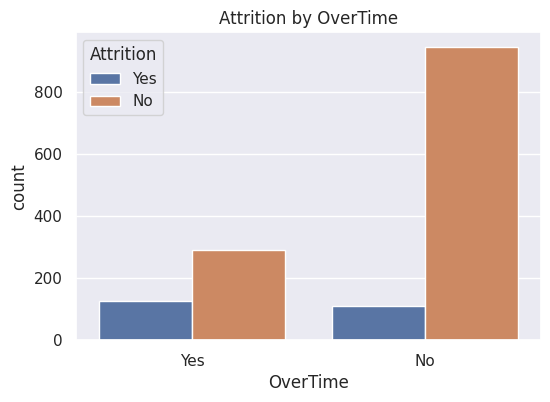

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition by OverTime")
plt.show()


**As we may notice that over-time is highly correlated with attrition. Employees who work afterhours leave at a higher rate (Around 25%) compared to those who don’t (Whereabouts of 10%).**

**Next up we'll calculate the exact percentage.**

In [8]:

attrition_overtime = df.groupby("OverTime")["Attrition"].value_counts(normalize=True).unstack() * 100
print(attrition_overtime.round(2))
#As expected, Workers who don't work overtime have a percent of 10.44% of resigning 
#While the ones who do overtime are expected to have a percentage of 30.53% of resigning.

Attrition     No    Yes
OverTime               
No         89.56  10.44
Yes        69.47  30.53


**> Next up we're gonna explore other causes of attrition based on job position / department**

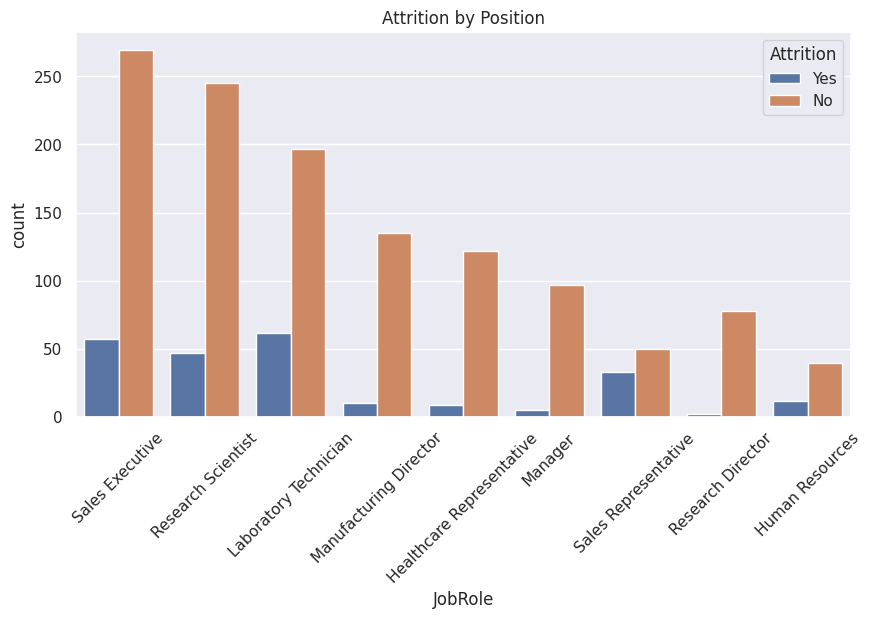

In [9]:
plt.figure(figsize=(10,5)) 
sns.countplot(x="JobRole", hue="Attrition", data=df)
plt.title("Attrition by Position")
plt.xticks(rotation=45)
plt.show()


**Apparently, what we can see here, "Laboratory Technicician" has the highest percentile of turnover, coming right behind it is the "Sales Executive" and also Research Scientist.**

**Let's calculate the exact percentage of each departments and its respected attrition ratio**

In [10]:
JobRole_Attrition= df.groupby("JobRole")["Attrition"].value_counts(normalize=True).unstack() * 100
sorted_roles = JobRole_Attrition.sort_values(by="Yes", ascending=False)
print(sorted_roles.head(3).round(2))


Attrition                 No    Yes
JobRole                            
Sales Representative   60.24  39.76
Laboratory Technician  76.06  23.94
Human Resources        76.92  23.08


**Based on the ratio of employees-to-attrition, we'll notice that the top attrition-based position is the Sales representative with a ratio of 39.76%, followed by both Technician and HR.**

**Let's take a look at attrition and how its correlated to income**


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


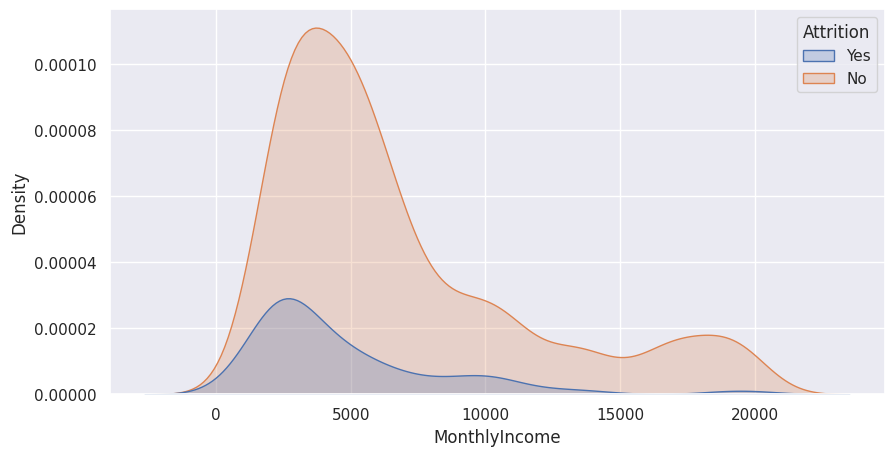

In [11]:
import warnings
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="MonthlyIncome",hue="Attrition",fill=True)
plt.title=("Attrition by Income")
plt.show() 

**Based on the above figure, Personal Salary is STRONGLY correlated with attrition, where Employees with low salaries are more likely to resign, while those with higher salaries are more likely to stay.**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


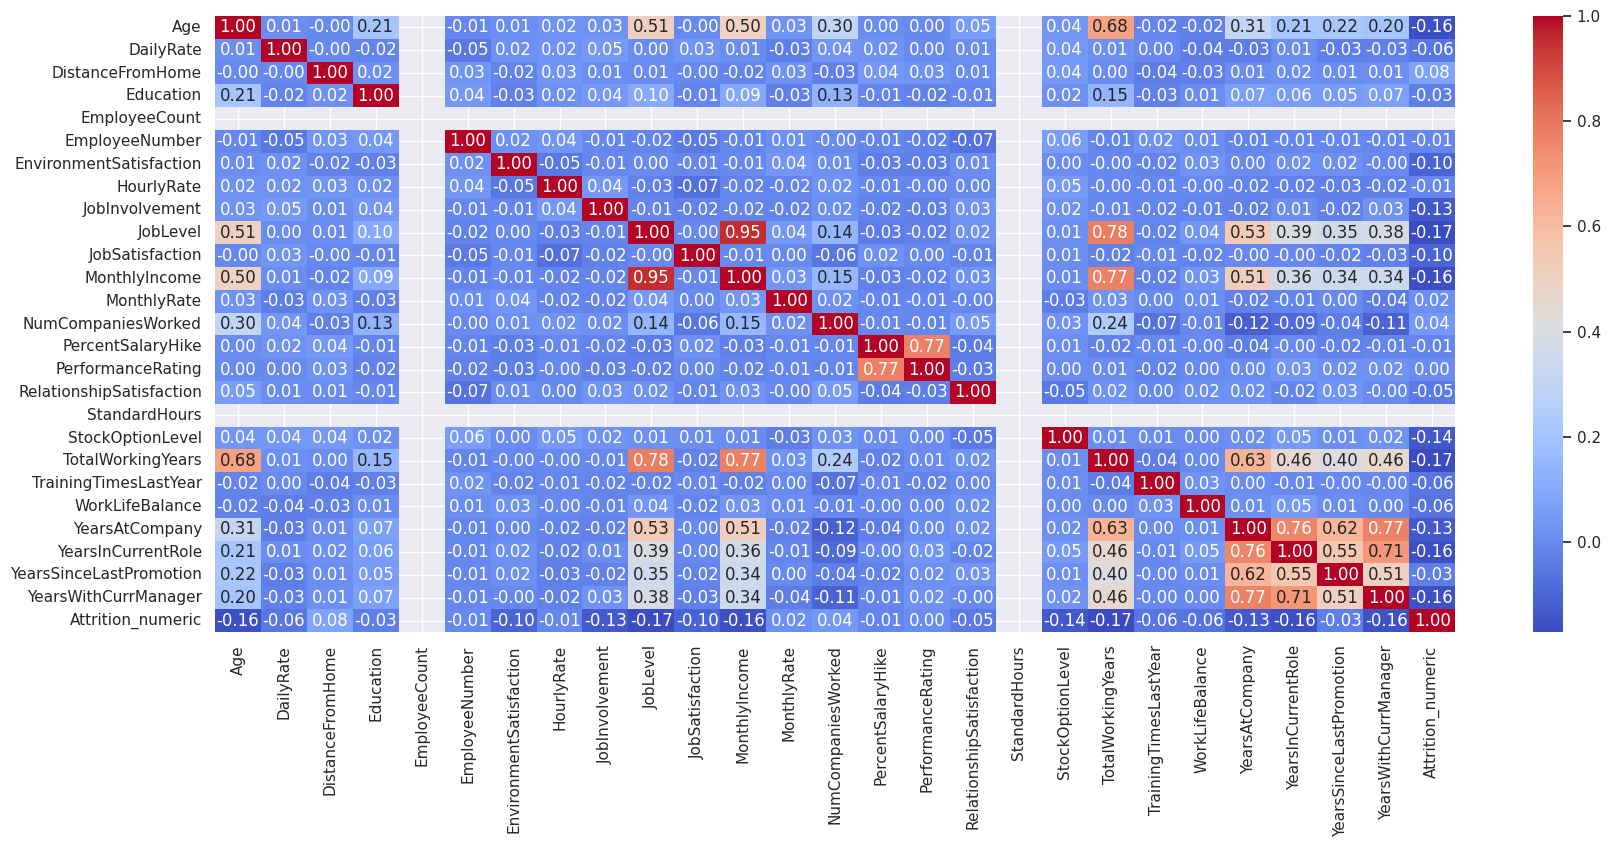

In [12]:
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr() 
plt.figure(figsize=(20,8))
sns.heatmap(data=corr, annot=True, fmt=".2f", cmap="coolwarm",cbar=True)
plt.title=("Correlation Heatmap")
plt.show()

**This simple heatmap highlights each column and how its correlated with other columns, where 0 to 1 (Red) shows strong positive correlation and -1 to 0 (Blue) shows negative correlation. Values with ~zero shows no correlation**

In [13]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

if 'Attrition_numeric' in corr.columns:
    attrition_corr = corr['Attrition_numeric'].sort_values(ascending=False)
    print("Top 5 Positive Correlations:\n", attrition_corr.head(6))
    print("\nTop 5 Negative Correlations:\n", attrition_corr.tail(5))
else:
    print("Column 'Attrition_numeric' not found in numeric columns.")


            


Top 5 Positive Correlations:
 Attrition_numeric     1.000000
DistanceFromHome      0.077924
NumCompaniesWorked    0.043494
MonthlyRate           0.015170
PerformanceRating     0.002889
HourlyRate           -0.006846
Name: Attrition_numeric, dtype: float64

Top 5 Negative Correlations:
 YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
EmployeeCount              NaN
StandardHours              NaN
Name: Attrition_numeric, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()



**This analysis explored employee attrition trends across different factors.  We visualized distributions (Job Role, Income, etc.) and created a correlation heatmap to identify relationships between variables.**

Key findings:- 
* Some variables show stronger correlations with attrition than others.
* These insights can guide HR policies to reduce turnover.
